<h1><font color="#BD1E51">PDF PLUMBER PYTHON</font></h1>
<font color="#2568FB">
Plumb a PDF for detailed information about each text character, rectangle, and line.
Plus: Table extraction and visual debugging.
Works best on machine-generated, rather than scanned, PDFs. Built on pdfminer.six.
</font>


In [1]:
# Package installtion.
# !pip install pdfplumber

In [2]:
# command line working.
# !pdfplumber Documents/karza_code/pdf-processing/pdf_with_table.pdf > one.csv

In [2]:
# importing packages
import pdfplumber as pp
import pandas as pd

In [3]:
# file path 
path1 = "test_samples/1to30tables-converted.pdf"
path2 = "test_samples/pdf_with_table.pdf"
path3 = "test_samples/temp_1362.pdf"
path4 = ""

In [4]:
# opening files with pp
pdf1 = pp.open(path1)
pdf1

In [6]:
pd.DataFrame(pp.open("test_samples/RoCJaipur_20220324.pdf").pages[1].extract_tables()[0]).head()

,0,1,2
0,S.no,CIN,Name of the company
1,1,U74999RJ2017PTC057318,24-7 READY CARE UNIT PRIVATE LIMITED
2,2,U92411RJ2013PTC041450,360 DEGREES HEALTHEQUIP PRIVATE LIMITED
3,3,U45201RJ2015PTC047552,4 POINTS TOWN PLANNER PRIVATE LIMITED
4,4,U45201RJ2014PTC044758,5S CONSTRUCTIONS PRIVATE LIMITED


In [7]:
# opening pdf with properties.
pdf = pp.open("test_samples/RoCJaipur_20220324.pdf",
    laparams={
        "line_overlap":0.5,
        "char_margin":2.0,
        "line_margin":0.5,
        "word_margin":0.1,
        "boxes_flow":0.5,
        "detect_vertical":True,
        "all_texts":False
        }
    )


In [13]:
# Exploring pdfplumber.pdf class.

# Getting images
# print(pdf.images)

# cheking all laparams
# print(pdf.laparams)

# Getting hyperlinks.
# print(pdf.hyperlinks)

# getting metadata
# print(pdf.metadata)

# getting all pages.
# print(pdf.pages)


# getting number of pages.
print("total pages: ", len(pdf.pages))

total pages:  32


In [14]:
# Getting any page.
page1 = pdf.pages[1]

In [15]:
# getting dimensions of page.
page1.bbox

(0, 0, 612, 792)

In [16]:
# Getting all the texts details.
pd.DataFrame(page1.chars).head(2)

,matrix,fontname,adv,upright,x0,y0,x1,y1,width,height,size,object_type,page_number,text,stroking_color,non_stroking_color,top,bottom,doctop
0,"(1, 0, 0, 1, 77.664, 733.32)",Times New Roman,5.53776,True,77.66400,731.16864,83.20176,741.12864,5.53776,9.96,9.96,char,2,S,0,0,50.87136,60.83136,892.67136
1,"(1, 0, 0, 1, 83.20176000000001, 733.32)",Times New Roman,2.49000,True,83.20176,731.16864,85.69176,741.12864,2.49000,9.96,9.96,char,2,.,0,0,50.87136,60.83136,892.67136


In [17]:
# Extracting all the texts.
page1.extract_text()

' \n \nTable-“A” \nS.no  CIN  Name of the company \n24-7 READY CARE UNIT PRIVATE LIMITED  \n1  U74999RJ2017PTC057318 \n360 DEGREES HEALTHEQUIP PRIVATE LIMITED  \n2  U92411RJ2013PTC041450 \n4 POINTS TOWN PLANNER PRIVATE LIMITED  \n3  U45201RJ2015PTC047552 \n5S CONSTRUCTIONS PRIVATE LIMITED  \n4  U45201RJ2014PTC044758 \n7S CONSULTANTS AND SERVICES PRIVATELIMITED  \n5  U74140RJ2013PTC043441 \nA B TRANSPORT PRIVATE LIMITED  \n6  U60221RJ2000PTC016701 \nA.A.B. AGRO FARMS PRIVATE LIMITED  \n7  U01110RJ2017PTC057340 \nA.R.B. AGRICULTURE AND FARMING PRIVATELIMITED  \n8  U01100RJ2017PTC057666 \nA2 ORGANIC MILK ANDORGANIC PRODUCTSPRIVATE \nLIMITED  \n9  U15119RJ2016PTC054778 \nAAKRITI INFRADEVELOPERS PRIVATE LIMITED  \n10  U45201RJ2011PTC034022 \nAAKS AND BROS. TECHNOLOGY SOLUTIONSPRIVATE LIMITED  \n11  U72900RJ2016PTC054714 \nAALYAM REALTORS PRIVATE LIMITED (OPC)  \n12  U70101RJ2014OPC045826 \nAANIKA BUILDERS ANDDEVELOPERS PRIVATELIMITED  \n13  U70101RJ2013PTC042760 \nAARAV BUILDHOMES PRIVATE L

In [18]:
# Extracting all the words.
pd.DataFrame(page1.extract_words()).head()

,text,x0,x1,top,doctop,bottom,upright,direction
0,Table-“A”,284.93000,327.05596,24.35136,866.15136,34.31136,True,1
1,S.no,77.66400,95.60196,50.87136,892.67136,60.83136,True,1
2,CIN,126.14000,143.28116,50.87136,892.67136,60.83136,True,1
3,Name,262.49000,286.22468,50.87136,892.67136,60.83136,True,1
4,of,288.75452,297.10100,50.87136,892.67136,60.83136,True,1


In [20]:
#getting images and hyperlinks. 
# page1.images
# page1.hyperlinks

In [21]:
# cheking if rotation.
page1.rotation

0

In [22]:
# Searching any text on page.
page1.search("U74999RJ2017PTC057318")

[{'text': 'U74999RJ2017PTC057318',
  'groups': (),
  'x0': 126.14,
  'top': 66.59136000000001,
  'x1': 237.21392000000006,
  'bottom': 76.55135999999993,
  'chars': [{'matrix': (1, 0, 0, 1, 126.14, 717.6),
    'fontname': 'Times New Roman',
    'adv': 7.191120000000001,
    'upright': True,
    'x0': 126.14,
    'y0': 715.4486400000001,
    'x1': 133.33112,
    'y1': 725.40864,
    'width': 7.191119999999998,
    'height': 9.959999999999923,
    'size': 9.959999999999923,
    'object_type': 'char',
    'page_number': 2,
    'text': 'U',
    'stroking_color': 0,
    'non_stroking_color': 0,
    'top': 66.59136000000001,
    'bottom': 76.55135999999993,
    'doctop': 908.39136},
   {'matrix': (1, 0, 0, 1, 133.33112, 717.6),
    'fontname': 'Times New Roman',
    'adv': 4.98,
    'upright': True,
    'x0': 133.33112,
    'y0': 715.4486400000001,
    'x1': 138.31112,
    'y1': 725.40864,
    'width': 4.97999999999999,
    'height': 9.959999999999923,
    'size': 9.959999999999923,
    'obj

In [23]:

# cheding width and height
page1.width
page1.height
page1.mediabox

[0, 0, 612, 792]

In [25]:
# page_number.
page1.page_number

2

In [27]:
# cropping the page.
# (x0, top, x1, bottom)
page1.crop([0, 0, 400, 300]).extract_text()

' \n \nTable-“A” \nS.no  CIN  Name of the company \n24-7 READY CARE UNIT PRIVA\n1  U74999RJ2017PTC057318 \n360 DEGREES HEALTHEQUIP P\n2  U92411RJ2013PTC041450 \n4 POINTS TOWN PLANNER PR\n3  U45201RJ2015PTC047552 \n5S CONSTRUCTIONS PRIVATE\n4  U45201RJ2014PTC044758 \n7S CONSULTANTS AND SERVI\n5  U74140RJ2013PTC043441 \nA B TRANSPORT PRIVATE LIM\n6  U60221RJ2000PTC016701 \nA.A.B. AGRO FARMS PRIVATE\n7  U01110RJ2017PTC057340 \nA.R.B. AGRICULTURE AND FA\n8  U01100RJ2017PTC057666 \nA2 ORGANIC MILK ANDORGA\nLIMITED  \n9  U15119RJ2016PTC054778 \nAAKRITI INFRADEVELOPERS \n10  U45201RJ2011PTC034022 \nAAKS AND BROS. TECHNOLO\n11  U72900RJ2016PTC054714 \nAALYAM REALTORS PRIVATE\n12  U70101RJ2014OPC045826 \nAANIKA BUILDERS ANDDEVE'

In [32]:
# Collates all of the page's character objects into a single string.
# When layout=False: Adds spaces where the difference between the x1 of one character
# and the x0 of the next is greater than x_tolerance.
# Adds newline characters where the difference between the doctop of one character
# and the doctop of the next is greater than y_tolerance.

# When layout=True (experimental feature):
# Attempts to mimic the structural layout of the text on the page(s),
# using x_density and y_density to determine the minimum number
# of characters/newlines per "point," the PDF unit of measurement.
# All remaining **kwargs are passed to .extract_words(...)


# extract_text(x_tolerance=3, y_tolerance=3, layout=False, x_density=7.25, y_density=13, **kwargs)
page1.extract_text(x_tolerance=1, y_tolerance=3, layout=False)

' \n \nTable-“A” \nS.no  CIN  Name of the company \n24-7 READY CARE UNIT PRIVATE LIMITED  \n1  U74999RJ2017PTC057318 \n360 DEGREES HEALTHEQUIP PRIVATE LIMITED  \n2  U92411RJ2013PTC041450 \n4 POINTS TOWN PLANNER PRIVATE LIMITED  \n3  U45201RJ2015PTC047552 \n5S CONSTRUCTIONS PRIVATE LIMITED  \n4  U45201RJ2014PTC044758 \n7S CONSULTANTS AND SERVICES PRIVATELIMITED  \n5  U74140RJ2013PTC043441 \nA B TRANSPORT PRIVATE LIMITED  \n6  U60221RJ2000PTC016701 \nA.A.B. AGRO FARMS PRIVATE LIMITED  \n7  U01110RJ2017PTC057340 \nA.R.B. AGRICULTURE AND FARMING PRIVATELIMITED  \n8  U01100RJ2017PTC057666 \nA2 ORGANIC MILK ANDORGANIC PRODUCTSPRIVATE \nLIMITED  \n9  U15119RJ2016PTC054778 \nAAKRITI INFRADEVELOPERS PRIVATE LIMITED  \n10  U45201RJ2011PTC034022 \nAAKS AND BROS. TECHNOLOGY SOLUTIONSPRIVATE LIMITED  \n11  U72900RJ2016PTC054714 \nAALYAM REALTORS PRIVATE LIMITED (OPC)  \n12  U70101RJ2014OPC045826 \nAANIKA BUILDERS ANDDEVELOPERS PRIVATELIMITED  \n13  U70101RJ2013PTC042760 \nAARAV BUILDHOMES PRIVATE L

In [35]:
page1.extract_words(
    x_tolerance=1,
    y_tolerance=3,
    )

[{'text': 'Table-“A”',
  'x0': 284.93,
  'x1': 327.05596,
  'top': 24.35136,
  'doctop': 866.15136,
  'bottom': 34.31135999999992,
  'upright': True,
  'direction': 1},
 {'text': 'S.no',
  'x0': 77.664,
  'x1': 95.60196,
  'top': 50.87135999999998,
  'doctop': 892.6713599999999,
  'bottom': 60.831359999999904,
  'upright': True,
  'direction': 1},
 {'text': 'CIN',
  'x0': 126.14,
  'x1': 143.28116,
  'top': 50.87135999999998,
  'doctop': 892.6713599999999,
  'bottom': 60.831359999999904,
  'upright': True,
  'direction': 1},
 {'text': 'Name',
  'x0': 262.49,
  'x1': 286.22468,
  'top': 50.87135999999998,
  'doctop': 892.6713599999999,
  'bottom': 60.831359999999904,
  'upright': True,
  'direction': 1},
 {'text': 'of',
  'x0': 288.75452,
  'x1': 297.10100000000006,
  'top': 50.87135999999998,
  'doctop': 892.6713599999999,
  'bottom': 60.831359999999904,
  'upright': True,
  'direction': 1},
 {'text': 'the',
  'x0': 299.53124,
  'x1': 311.7422,
  'top': 50.87135999999998,
  'doctop': 8

In [38]:
# Searching with regex.
import re
cin_pattern = re.compile("[A-Za-z]{1}[0-9OS]{5}[A-Za-z0]{2}[0-9OS]{4}[A-Za-z0]{3}[0-9OS]{6}")
t = page1.search(pattern=cin_pattern, regex=True, case=True)
# t

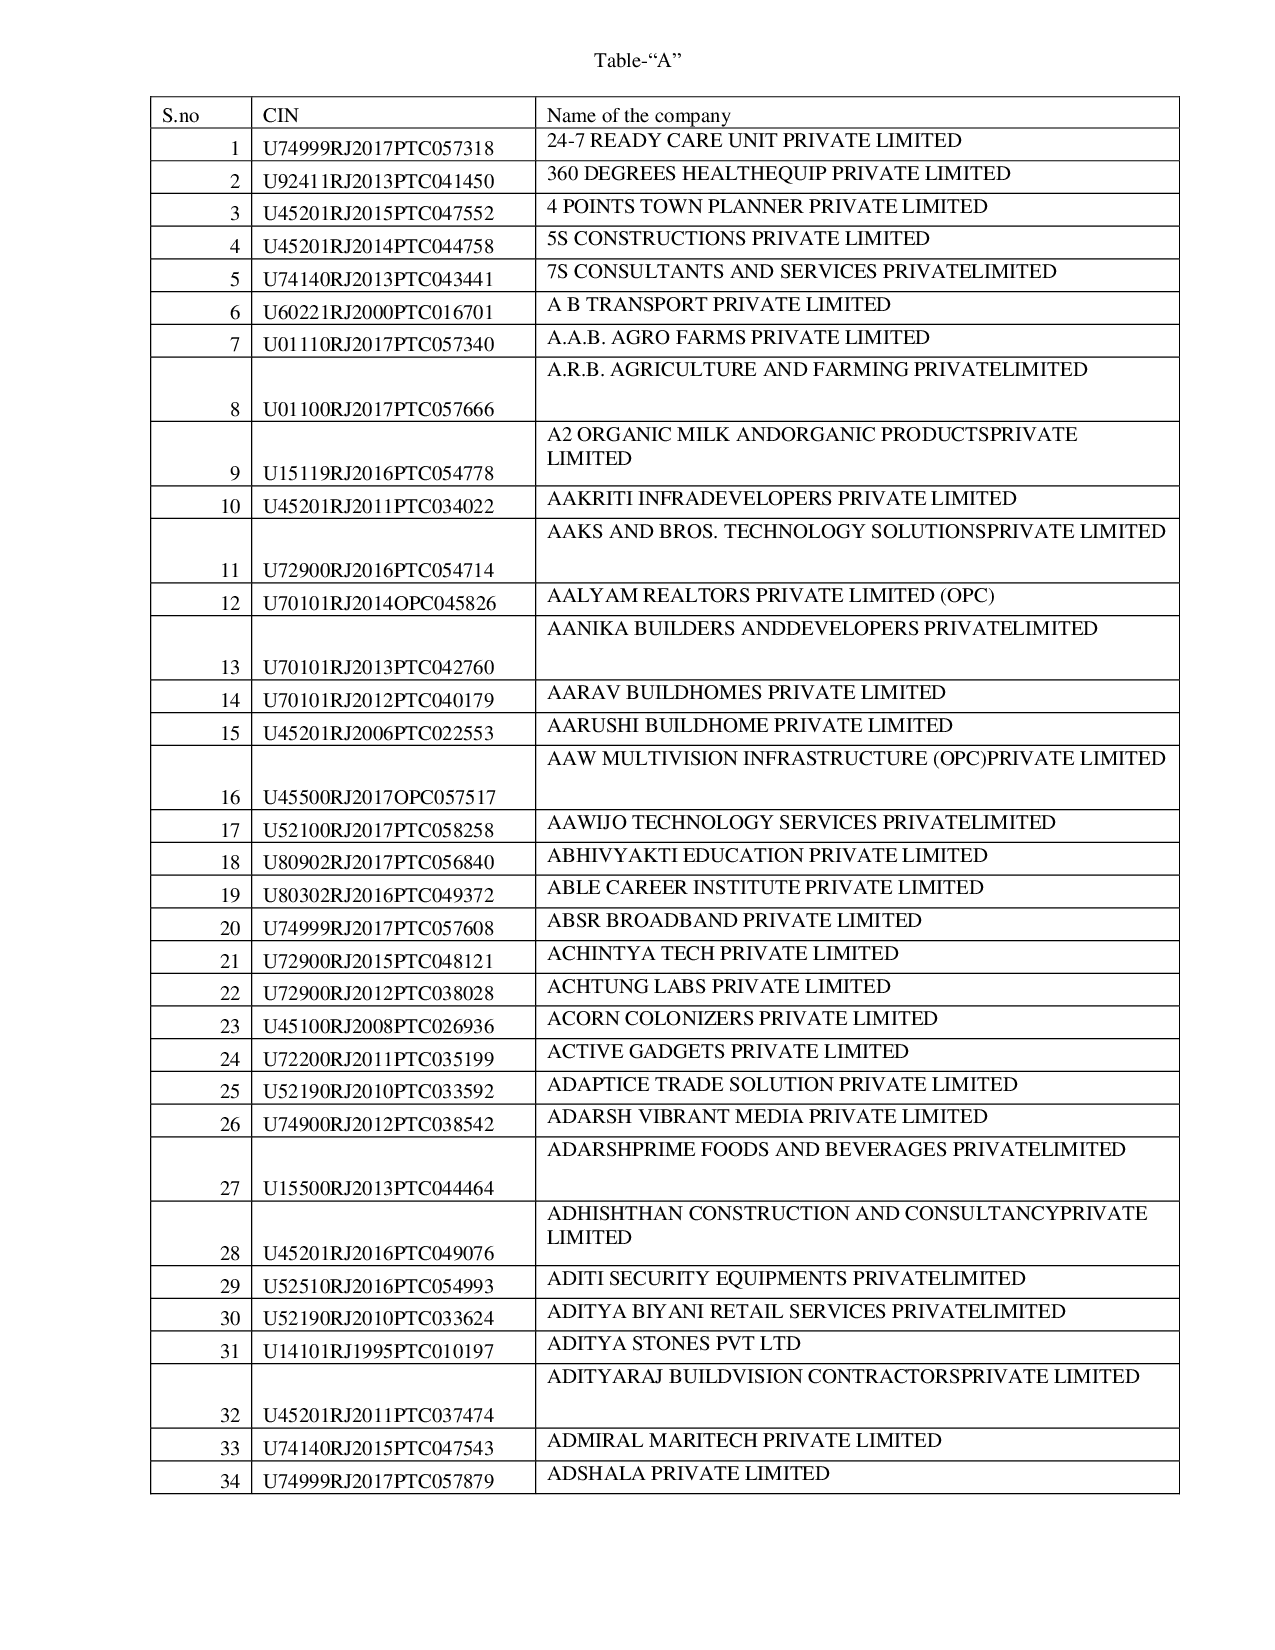

In [39]:
# Visual Dibugging
im = page1.to_image(resolution=150)
im

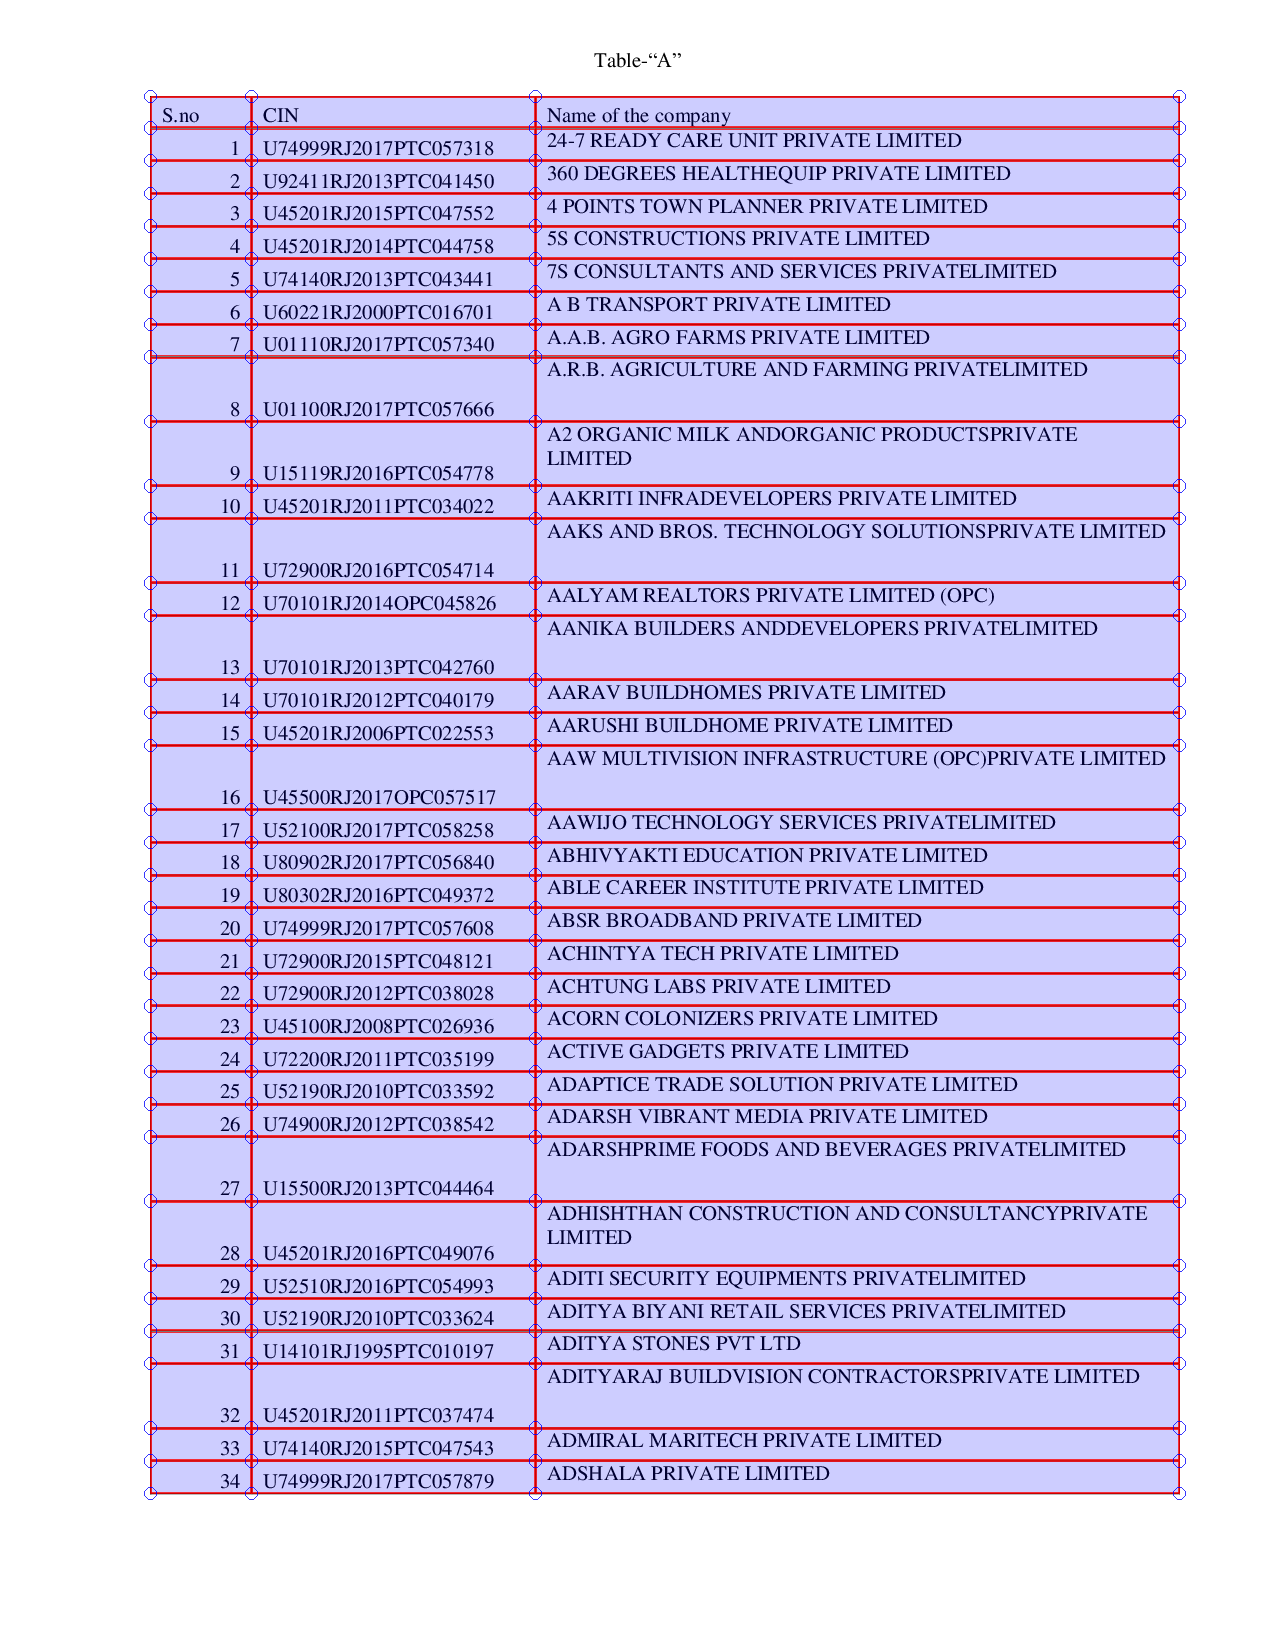

In [40]:
im.debug_tablefinder()

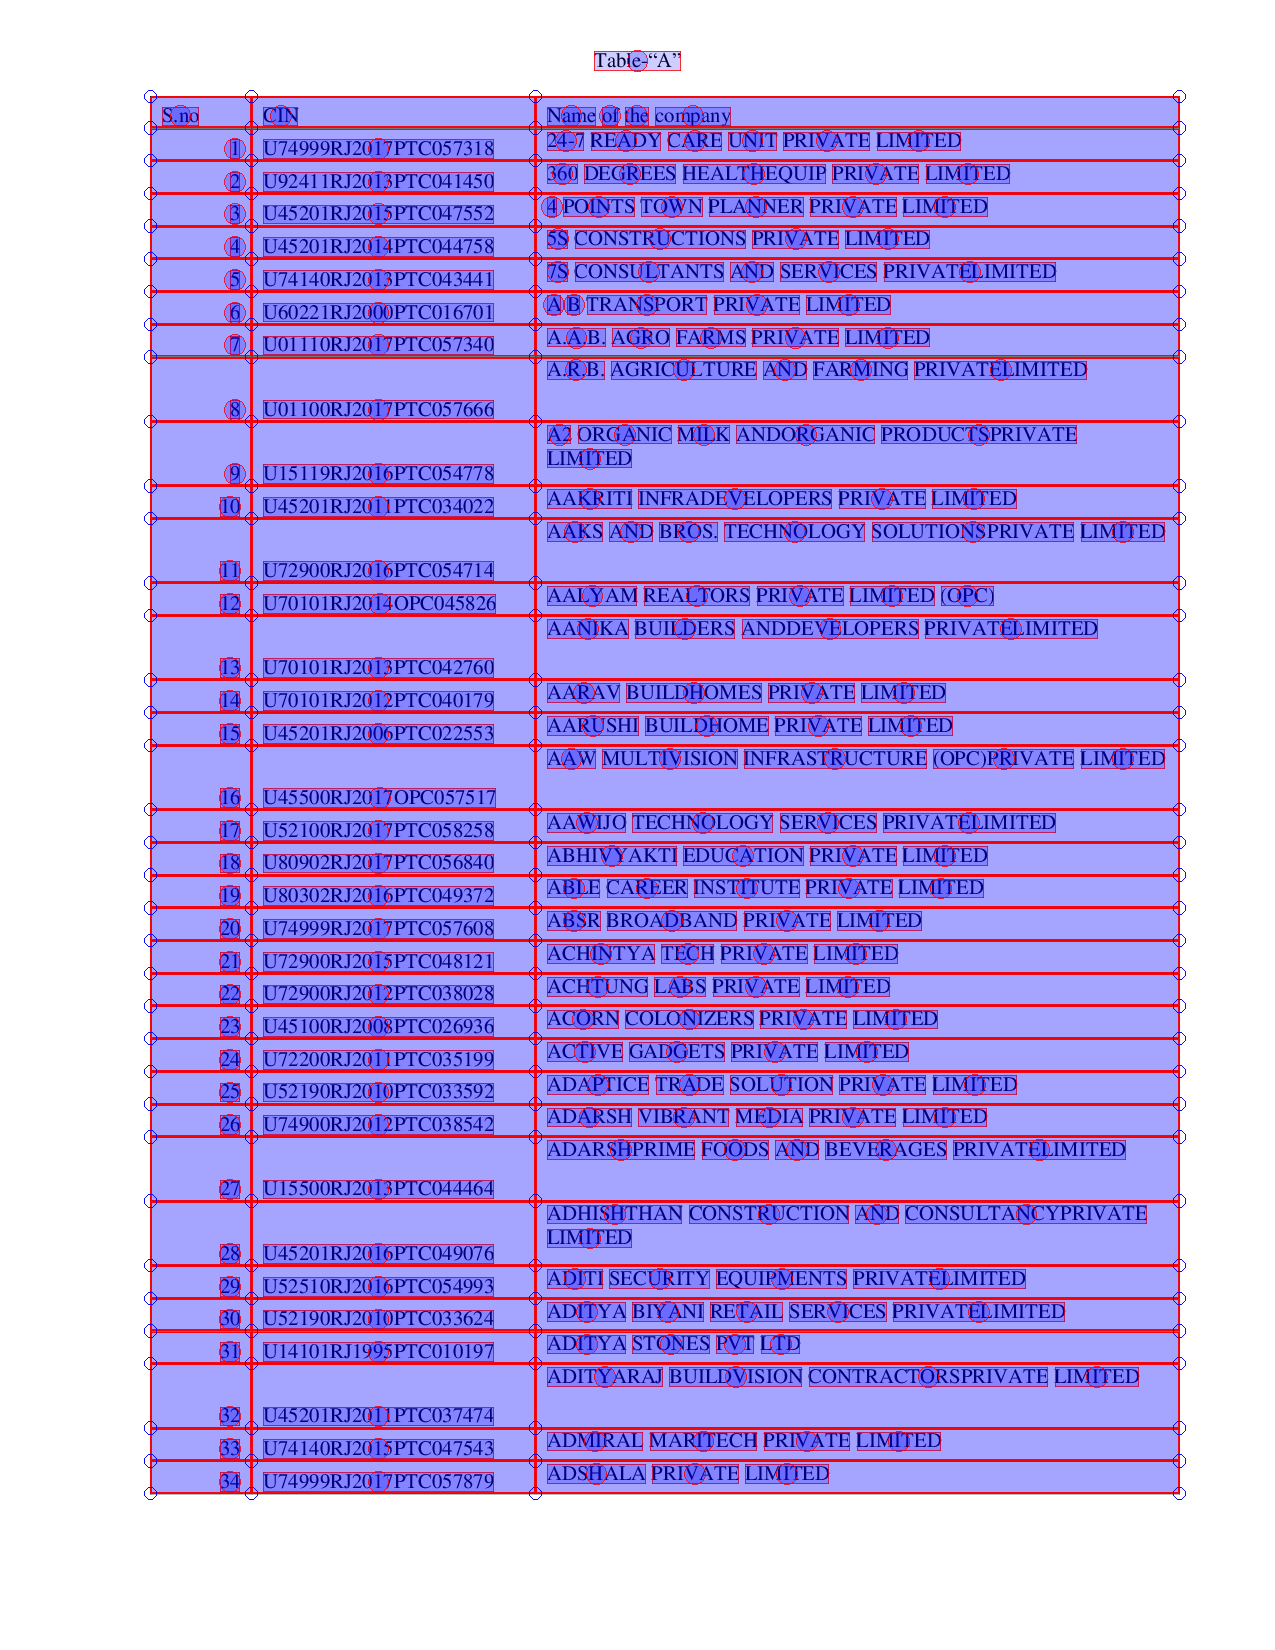

In [43]:
# Visual debugging.
# im.draw_rects(page1.extract_words())
im.draw_circles(page1.extract_words())


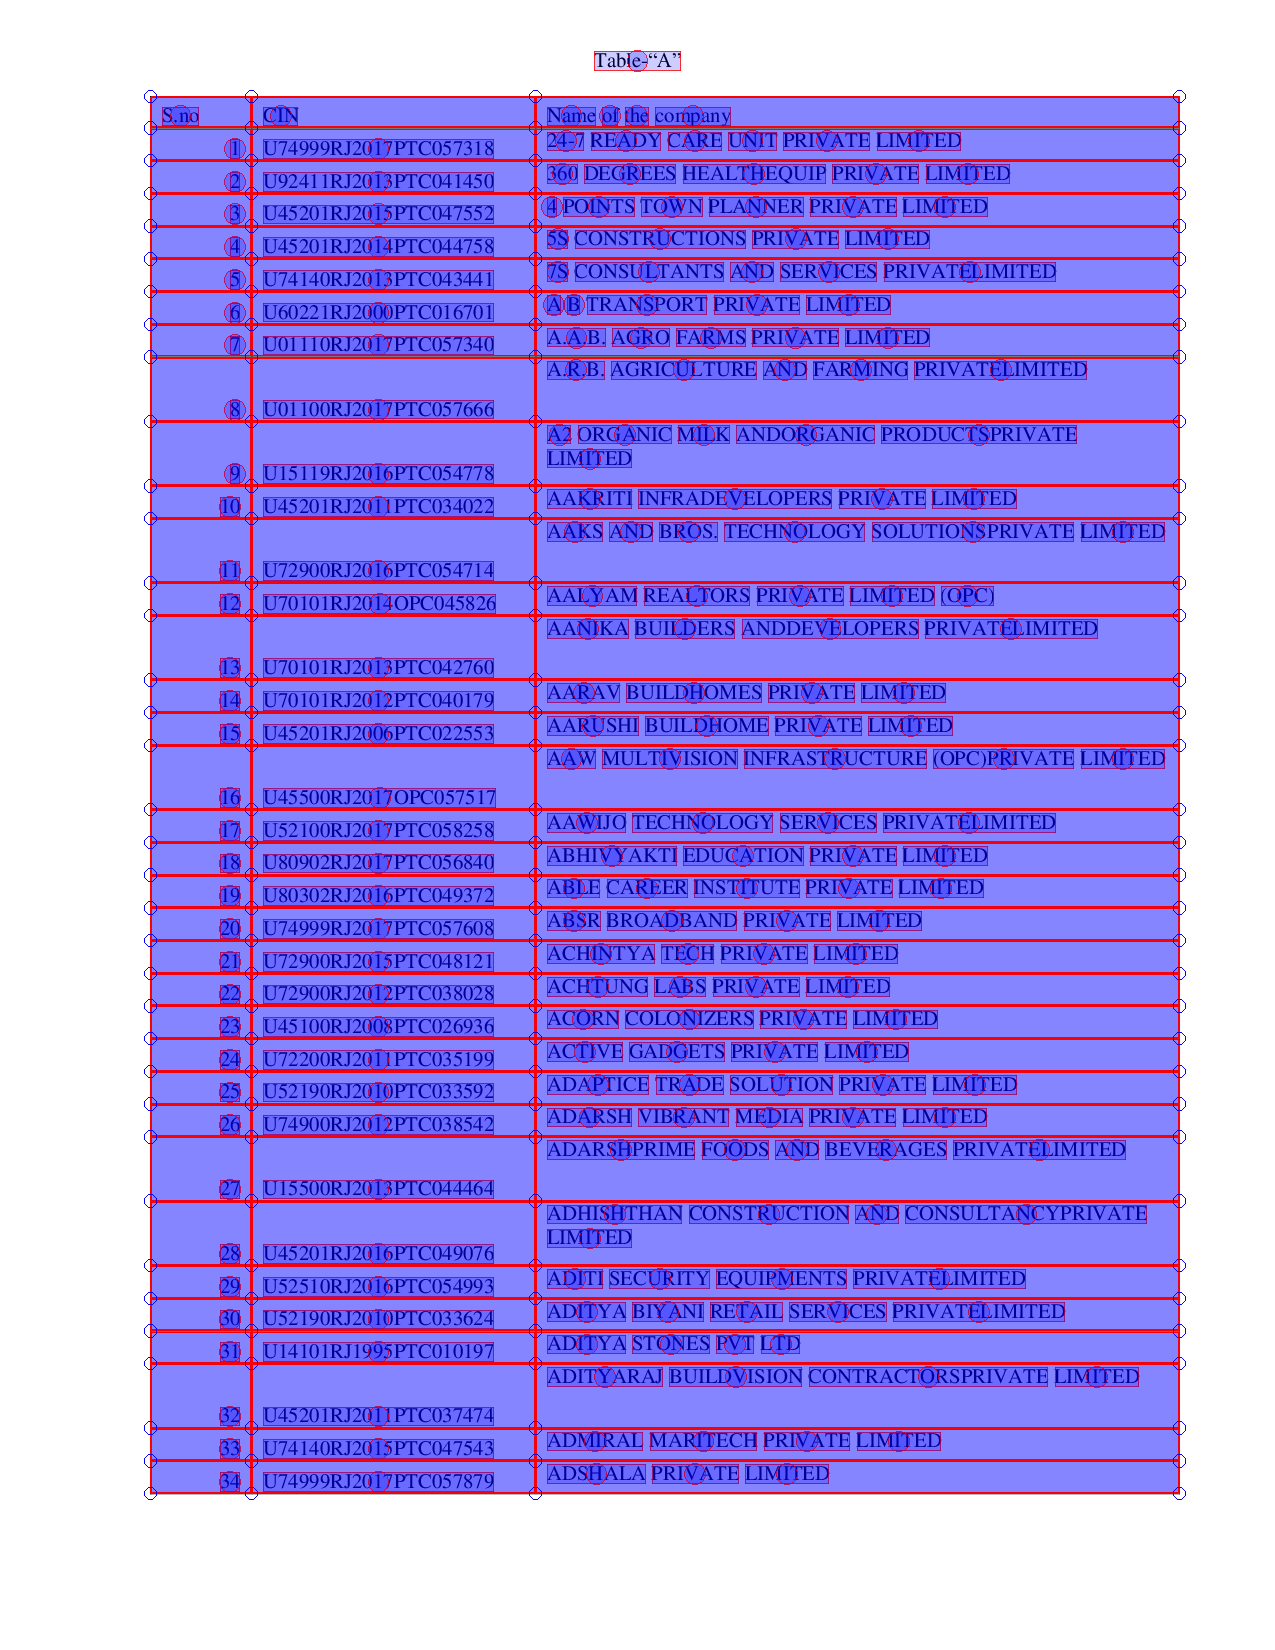

In [44]:
im.debug_tablefinder()

# Extracting Tables.

In [45]:
tbls = page1.find_tables()
tbls

In [46]:
# Tables position
tbls[0].bbox

(72.26399999999997, 46.43999999999994, 566.1600199999997, 716.97601)

In [47]:
# getting rows.
tbls[0].rows

In [49]:
pd.DataFrame(tbls[0].extract()).head()

,0,1,2
0,S.no,CIN,Name of the company
1,1,U74999RJ2017PTC057318,24-7 READY CARE UNIT PRIVATE LIMITED
2,2,U92411RJ2013PTC041450,360 DEGREES HEALTHEQUIP PRIVATE LIMITED
3,3,U45201RJ2015PTC047552,4 POINTS TOWN PLANNER PRIVATE LIMITED
4,4,U45201RJ2014PTC044758,5S CONSTRUCTIONS PRIVATE LIMITED


In [146]:
# .find_tables(table_settings={})	Returns a list of Table objects. The Table object provides access to the .cells, .rows, and .bbox properties, as well as the .extract(x_tolerance=3, y_tolerance=3) method.
# .extract_tables(table_settings={})	Returns the text extracted from all tables found on the page, represented as a list of lists of lists, with the structure table -> row -> cell.
# .extract_table(table_settings={})	Returns the text extracted from the largest table on the page, represented as a list of lists, with the structure row -> cell. (If multiple tables have the same size — as measured by the number of cells — this method returns the table closest to the top of the page.)
# .debug_tablefinder(table_settings={})	Returns an instance of the TableFinder class, with access to the .edges, .intersections, .cells, and .tables properties.


In [ ]:
# Table Settings.
table_settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "lines",
    "explicit_vertical_lines": [],
    "explicit_horizontal_lines": [],
    "snap_tolerance": 3,
    "snap_x_tolerance": 3,
    "snap_y_tolerance": 3,
    "join_tolerance": 3,
    "join_x_tolerance": 3,
    "join_y_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": 3,
    "text_y_tolerance": 3,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": 3,
    "intersection_y_tolerance": 3,
}

# "horizontal_strategy"	Either "lines", "lines_strict", "text", or "explicit". See explanation below.
# "explicit_vertical_lines"	A list of vertical lines that explicitly demarcate cells in the table. Can be used in combination with any of the strategies above. Items in the list should be either numbers — indicating the x coordinate of a line the full height of the page — or line/rect/curve objects.
# "explicit_horizontal_lines"	A list of horizontal lines that explicitly demarcate cells in the table. Can be used in combination with any of the strategies above. Items in the list should be either numbers — indicating the y coordinate of a line the full height of the page — or line/rect/curve objects.
# "snap_tolerance", "snap_x_tolerance", "snap_y_tolerance"	Parallel lines within snap_tolerance pixels will be "snapped" to the same horizontal or vertical position.
# "join_tolerance", "join_x_tolerance", "join_y_tolerance"	Line segments on the same infinite line, and whose ends are within join_tolerance of one another, will be "joined" into a single line segment.
# "edge_min_length"	Edges shorter than edge_min_length will be discarded before attempting to reconstruct the table.
# "min_words_vertical"	When using "vertical_strategy": "text", at least min_words_vertical words must share the same alignment.
# "min_words_horizontal"	When using "horizontal_strategy": "text", at least min_words_horizontal words must share the same alignment.
# "keep_blank_chars"	When using the text strategy, consider " " chars to be parts of words and not word-separators.
# "text_tolerance", "text_x_tolerance", "text_y_tolerance"	When the text strategy searches for words, it will expect the individual letters in each word to be no more than text_tolerance pixels apart.
# "intersection_tolerance", "intersection_x_tolerance", "intersection_y_tolerance"	When combining edges into cells, orthogonal edges must be within intersection_tolerance pixels to be considered intersecting.


# Strategy Description
# "lines"	Use the page's graphical lines — including the sides of rectangle objects — as the borders of potential table-cells.
# "lines_strict"	Use the page's graphical lines — but not the sides of rectangle objects — as the borders of potential table-cells.
# "text"	For vertical_strategy: Deduce the (imaginary) lines that connect the left, right, or center of words on the page, and use those lines as the borders of potential table-cells. For horizontal_strategy, the same but using the tops of words.
# "explicit"	Only use the lines explicitly defined in explicit_vertical_lines / explicit_horizontal_lines.

In [149]:
# It is important to crop page before extracting tables.
# Page.crop(bounding_box) — before trying to extract the table.
# In this way accuracy will improve a lot.

In [53]:
# im.debug_tablefinder()

In [77]:
pdf = pp.open("/home/k10280/Documents/karza_code/pdf-processing/test_samples/Elysium Pharmaceuticals_r_08092014.pdf")

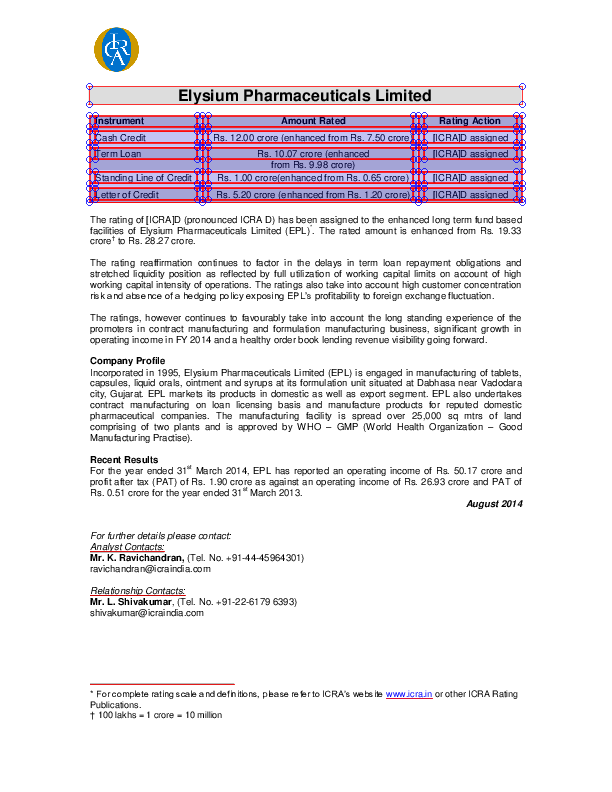

In [78]:
table_settings = {
    # "vertical_strategy": "", 
    # "horizontal_strategy": "text",
}
im = pdf.pages[0].to_image()
im.debug_tablefinder()

In [79]:
pd.DataFrame(pdf.pages[0].extract_table(table_settings=table_settings)).to_csv("one.csv")